In [1]:
import re
import pandas as pd
import numpy as np
import emoji
import matplotlib as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [14]:
import pandas as pd

# read file by lines
file_path = "chat.txt"
f = open(file_path, 'r')
data = f.readlines()
f.close()

# sanity stats
print('num lines: %s' %(len(data)))

# parse text and create list of lists structure
# remove first whatsapp info message
dataset = data[1:]
cleaned_data = []
for line in dataset:
	# grab the info and cut it out
	date = line.split(",")[0]
	line2 = line[len(date):]
	time = line2.split("-")[0][2:]
	line3 = line2[len(time):]
	name = line3.split(":")[0][4:]
	line4 = line3[len(name):]
	message = line4[6:-1] # strip newline charactor

	#print(date, time, name, message)
	cleaned_data.append([date, time, name, message])

  
# Create the DataFrame 
df = pd.DataFrame(cleaned_data, columns = ['Date', 'Time', 'Name', 'Message']) 

# check formatting 
if 0:
	print(df.head())
	print(df.tail())

# Save it!
df.to_csv(r'converted_messages.csv', index=False)

num lines: 59


In [15]:
df

,Date,Time,Name,Message
0,10/02/22,8:50â€¯pm,Priyanka More,For lab ia what we have read?
1,10/02/22,10:13â€¯pm,+91 91643 78734,Everything
2,10/02/22,10:14â€¯pm,+91 91643 78734,This message was deleted
3,10/02/22,10:14â€¯pm,+91 91643 78734,Everything u have to write
4,10/02/22,10:14â€¯pm,+91 91643 78734,Except theory
5,10/02/22,10:14â€¯pm,Priyanka More,Ok mam
6,10/02/22,10:14â€¯pm,Priyanka More,Tq mam
7,10/02/22,10:19â€¯pm,Priyanka More,For B div we have lab ia from wed. But we are ...
8,10/02/22,10:19â€¯pm,Priyanka More,Because completed lab experiments last week on...
9,11/02/22,12:40â€¯pm,+91 91643 78734,Ull can come on Monday Tuesday morning and do ...


In [16]:
data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head()

,Date,Time,Name,Message,positive,negative,neutral
0,10/02/22,8:50â€¯pm,Priyanka More,For lab ia what we have read?,0.0,0.0,1.0
1,10/02/22,10:13â€¯pm,+91 91643 78734,Everything,0.0,0.0,1.0
2,10/02/22,10:14â€¯pm,+91 91643 78734,This message was deleted,0.0,0.0,1.0
3,10/02/22,10:14â€¯pm,+91 91643 78734,Everything u have to write,0.0,0.0,1.0
4,10/02/22,10:14â€¯pm,+91 91643 78734,Except theory,0.0,0.0,1.0


In [17]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [18]:
df.Name.unique()

array(['Priyanka More', '+91 91643 78734'], dtype=object)

In [19]:
media_messages = df[df['Message'] == 'Tq'].shape[0]
print(media_messages)

2


There are 1183 words in all the messages.


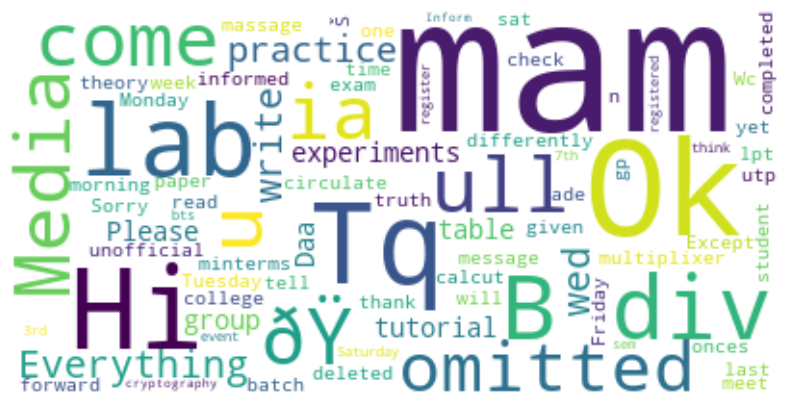

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming df is a DataFrame with a column named 'Message'
text = " ".join(review for review in df["Message"])

print("There are {} words in all the messages.".format(len(text)))

stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image using matplotlib
if not callable(plt.figure):  # Check if plt.figure is callable
    plt = matplotlib.pyplot  # Reassign plt to matplotlib.pyplot

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()